In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn

Auch Seaborn hat eine hilfreiche Internetseite:

https://seaborn.pydata.org/index.html

Du Kannst unter **Gallery** verschiedene Beispiele anschauen und diese somit Nachbauen. Im **Tutorial** wirst Du Schritt für Schritt in verschiedene Visualisierungsarten eingeführt. Eine Übersicht über die Plottingmöglichkeiten bekommst Du auf **API**.

Wir wollen unsere Gedanken nochmals kurz zurückschweifen lassen. Könnt Ihr Euch noch an die Einführung in Visualisierung erinnern? Dort haben wir Seaborn als **Higher Level** System bezeichnet, welches auf dem **Lower Level** System Matplotlib aufbaut.

Unser Schema von Matplotlib war:

Also, wenn ein Seaborn Plot auf Matplotlib aufbaut, müssen wir doch eigentlich nur den Plot ändern?

==> Jain. Es gibt 2 Unterschiedliche Typen von Plots bei Seaborn. Bei dem einen ist dies der Fall, bei dem anderen nicht.

Bevor wir die beiden Typen von Plots betrachten, schauen wir uns an, welche Datensätze Seaborn zur Verfügung stellt:

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Auf diese Datensätze können wir folgend zugreifen:

In [3]:
df = sns.load_dataset('penguins')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.loc[:, 'sex'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Nun wollen wir uns eine Übersicht über die Plot Funktionen in Seaborn erhalten.

## Überblick Seaborn Plot Funktionen

<img src = https://seaborn.pydata.org/_images/function_overview_8_0.png>

In dem Bild sehen wir verschiedene Funktionen (werden auch Module genannt) von Seaborn. Diese sind in Funktionen auf **Figuren Ebene** und **Achsen Ebene (Axes)** aufgeteilt.

## Funktionen auf Axen Ebene

Zu den Figuren auf Achsenebene zählen die Module in der  außer der ersten Reihe:

* scatterplot, lineplot
* histplot, kdeplot, ecdfplot, rugplot
* stripplot, swarmplot, boxplot, violinplot, pointplot, barplot

Diese Plot zeichnen in die "Axes". Hier ist das **Figuren Objekt von Matplotlib**. Also können wir hier das Schema von oben verwenden. Lediglich der Plot und die Verhübschungen auf der Achsenebene wir in Seaborn gemacht.

Schauen wir uns hierfür ein Beispiel an:

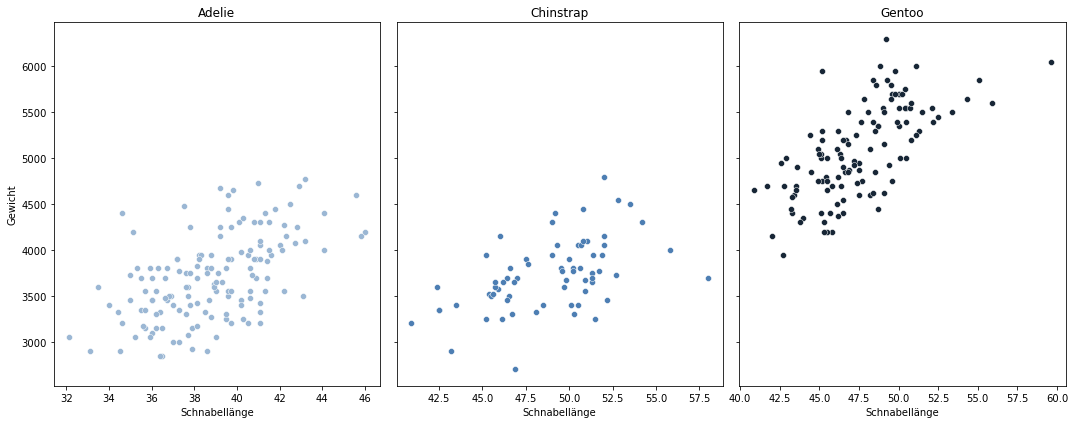

In [14]:
# Wir wollen 3 swarmplots nebeneinander je Species kreieren
fig, ax = plt.subplots(1, 3, figsize = (15, 6), sharey = True)

data = df            # Wir nehmen unsere Pinguin Datenbank
data = data.rename(columns = {'bill_length_mm': 'Schnabellänge', \
                            'body_mass_g': 'Gewicht'})
color = ['#9bb7d4', '#4d7eb3', '#172636']
species_list = df.species.unique()     # Liste der Species

for i in range(len(species_list)):
    
    sns.scatterplot(x = 'Schnabellänge', y = 'Gewicht', \
                    data = data[data.species == species_list[i]], \
                    ax = ax[i], color = color[i])
    ax[i].set_title(species_list[i])
    
fig.tight_layout() 

In [15]:
k = 0
for i in species_list:
     
    
    # i übernimmt nun die Werte der Species
    # Für die Positionierung der Kachel und abgreifen der 
    # Farbe benötige ich den Indexzugriff in den Listen
    
    k += 1
    

In [13]:
for index_liste, i in enumerate(species_list):
    print(index_liste)
    print('Species: ',  i)

0
Species:  Adelie
1
Species:  Chinstrap
2
Species:  Gentoo


Scheint also nicht so schwer zu sein! Jedoch müssen wir bei den Parametern aufpassen. Hier eine Übersicht (Auszug) vom Scatterplot in Matplotlib und Seaborn:

| Matplotlib | Seaborn | Bedeutung |
| --- | --- | --- | 
| x, y | x, y | Datenposition |
| data | data | Datensatz |
| --- | hue | Farbliche Gruppierung |
| s | --- | Markergröße |
| --- | size | Gruppierung Größe |
| c | --- | Farbe des Markers |
| marker | --- | Markerstyle |
| --- | style | Marker Gruppierung |
| cmap | palette | Farbpalette |
| alpha | --- | Blending Wert |


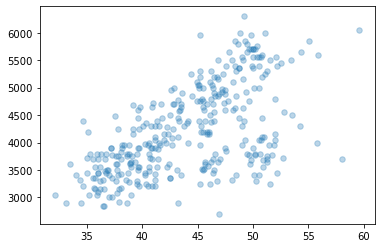

In [16]:
# Einfacher Scatterplot in Matplotlib
plt.scatter(data = df, x='bill_length_mm', 
            y='body_mass_g', 
            alpha = 0.3,  
            s = 30);

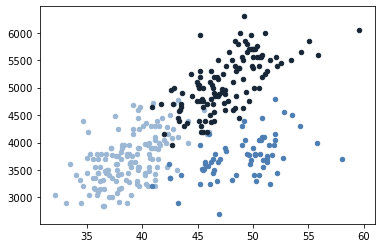

In [17]:
# Matplotlib: Scatterplot mit farblicher Unterscheidung je Species
color = ['#9bb7d4', '#4d7eb3', '#172636']

plt.scatter(data = df[df.species == 'Adelie'], 
            x='bill_length_mm', y='body_mass_g', \
            s = 20, c = color[0]);

plt.scatter(data = df[df.species == 'Chinstrap'], 
            x='bill_length_mm', y='body_mass_g',\
            s = 20, c = color[1]);

plt.scatter(data = df[df.species == 'Gentoo'], 
            x='bill_length_mm', y='body_mass_g',\
            s = 20, c = color[2]);

plt.show()

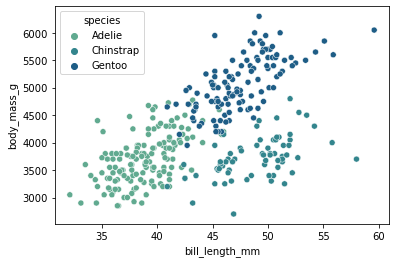

In [21]:
# Seaborn: farbliche Unterscheidung je Species mit 'hue'
sns.scatterplot(data=df, 
                x='bill_length_mm', y='body_mass_g', 
                hue="species", palette = 'crest');

In [23]:
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


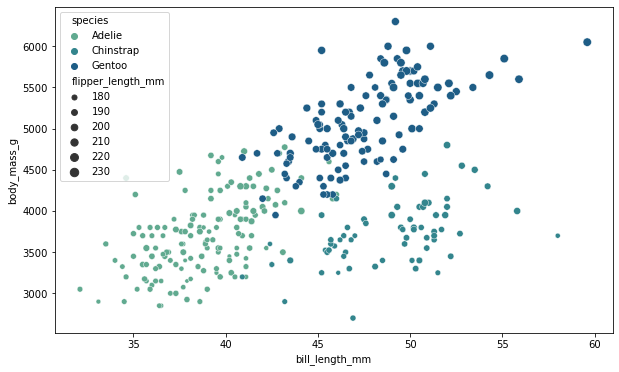

In [22]:
# Seaborn: Größe Marker je Flipper-Länge mit 'size'
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(data=df, 
                x='bill_length_mm', y='body_mass_g', 
                hue="species", palette = 'crest', 
                size = 'flipper_length_mm');

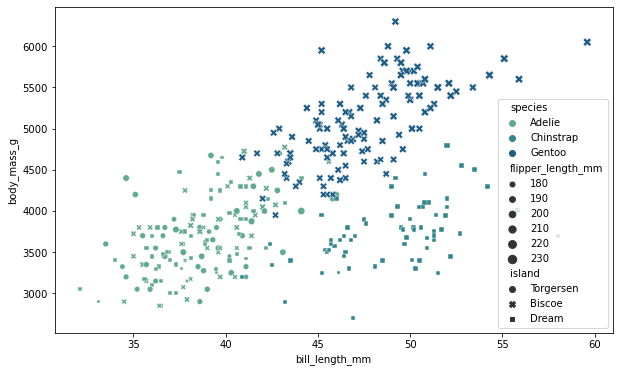

In [24]:
# Seaborn: Markerform je Insel mit 'style'
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue="species", \
                palette = 'crest', size = 'flipper_length_mm',\
               style = 'island');